In [1]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import json
import matplotlib.pyplot as plt


In [4]:
# Step 1: Load the data from JSON
with open("RandomNamesNEW.json", 'r') as json_file:
    data = json.load(json_file)

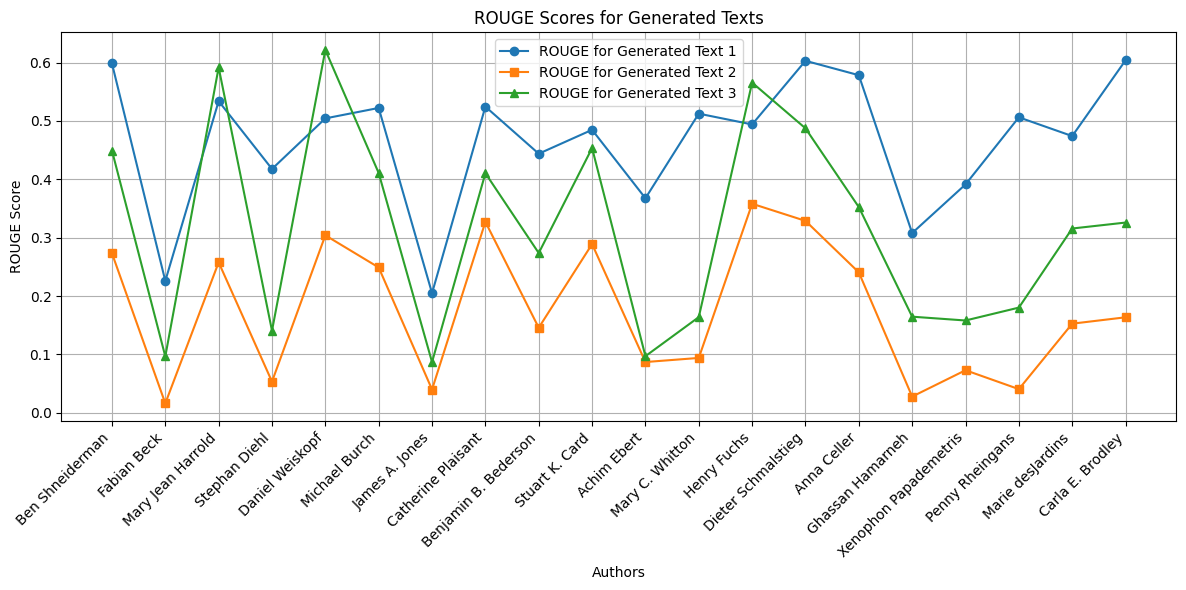

In [7]:
import csv
import matplotlib.pyplot as plt
import nltk
from nltk.translate.bleu_score import sentence_bleu
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.translate.bleu_score import sentence_bleu

# Custom tokenizer that splits on whitespace
def tokenizer(text):
    return text.split()

# List to store ROUGE scores
rouge_scores_generated1 = []
rouge_scores_generated2 = []
rouge_scores_generated3 = []
authors = []  # List to store author names

# Iterate over each entry in the JSON data
for i, entry in enumerate(data):
    author_name = entry['name']  # Assuming you have a key for author name
    existing_text = entry['existing_text']
    generated_text1 = entry['generated_text1']
    generated_text2 = entry['generated_text2']
    generated_text3 = entry['generated_text3']

    # Calculate ROUGE scores
    rouge_score_generated1 = nltk.translate.bleu_score.sentence_bleu([existing_text], generated_text1)
    rouge_score_generated2 = nltk.translate.bleu_score.sentence_bleu([existing_text], generated_text2)
    rouge_score_generated3 = nltk.translate.bleu_score.sentence_bleu([existing_text], generated_text3)

    rouge_scores_generated1.append(rouge_score_generated1)
    rouge_scores_generated2.append(rouge_score_generated2)
    rouge_scores_generated3.append(rouge_score_generated3)
    authors.append(author_name)  # Store author name

# Define x_values using author names
x_values = authors

# Create a list of dictionaries for each entry's ROUGE scores
results = []
for i in range(len(data)):
    result = {
        'Author': authors[i],
        'ROUGE_Generated_Text_1': rouge_scores_generated1[i],
        'ROUGE_Generated_Text_2': rouge_scores_generated2[i],
        'ROUGE_Generated_Text_3': rouge_scores_generated3[i]
    }
    results.append(result)

# Write the results to a CSV file
csv_file = 'rouge_scores.csv'
with open(csv_file, 'w', newline='') as csvfile:
    fieldnames = ['Author', 'ROUGE_Generated_Text_1', 'ROUGE_Generated_Text_2', 'ROUGE_Generated_Text_3']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for result in results:
        writer.writerow(result)

# Plot the ROUGE scores as line plots
plt.figure(figsize=(12, 6))

plt.plot(x_values, rouge_scores_generated1, label='ROUGE for Generated Text 1', marker='o')
plt.plot(x_values, rouge_scores_generated2, label='ROUGE for Generated Text 2', marker='s')
plt.plot(x_values, rouge_scores_generated3, label='ROUGE for Generated Text 3', marker='^')

plt.xlabel('Authors')
plt.ylabel('ROUGE Score')
plt.title('ROUGE Scores for Generated Texts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
